In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**----------------------------------------------------------Preparing Dataset-----------------------------------------------------------------**

In [ ]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
X = [] 
Y = [] 
for category in os.listdir('/content/drive/MyDrive/ml project/mini_news'):
    for document in os.listdir('/content/drive/MyDrive/ml project/mini_news/'+category):
        with open('/content/drive/MyDrive/ml project/mini_news/'+category+'/'+document,encoding="utf8", errors='ignore') as f:
            X.append((document,f.read()))
            Y.append(category)

In [ ]:
X


In [ ]:
len(X[0])

2

In [ ]:
Y

['rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorcycles',
 'rec (1).motorc

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=0)


In [ ]:
Y_train

['comp.sys.mac (1).hardware',
 'rec (1).autos',
 'rec.sport (1).baseball',
 'sci (1).space',
 'sci (1).crypt',
 'talk.politics (1).misc',
 'comp.windows (1).x',
 'rec.sport (1).hockey',
 'talk.politics (1).guns',
 'sci (1).electronics',
 'comp.sys.ibm.pc (1).hardware',
 'comp.os.ms-windows (1).misc',
 'comp.windows (1).x',
 'rec.sport (1).hockey',
 'comp.sys.ibm.pc (1).hardware',
 'rec (1).autos',
 'comp.sys.ibm.pc (1).hardware',
 'rec (1).motorcycles',
 'sci (1).med',
 'rec.sport (1).baseball',
 'sci (1).space',
 'talk.religion (1).misc',
 'comp (1).graphics',
 'comp.sys.ibm.pc (1).hardware',
 'talk.religion (1).misc',
 'comp.windows (1).x',
 'talk.religion (1).misc',
 'comp (1).graphics',
 'talk.religion (1).misc',
 'comp.sys.ibm.pc (1).hardware',
 'alt (1).atheism',
 'comp.sys.ibm.pc (1).hardware',
 'comp (1).graphics',
 'rec (1).autos',
 'talk.politics (1).mideast',
 'soc.religion (1).christian',
 'comp.sys.ibm.pc (1).hardware',
 'talk.politics (1).misc',
 'sci (1).space',
 'sci (1

In [ ]:
X_test

[('76279 (1)',
  'Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!news.udel.edu!darwin.sura.net!gatech!willis1.cis.uab.edu!news.ecn.bgu.edu!anaxagoras.ils.nwu.edu!ducky.ils.nwu.edu!kahana\nFrom: kahana@ducky.ils.nwu.edu (Jason Adam Kahana)\nNewsgroups: misc.forsale\nSubject: WANTED: Sharp EL5200\nDate: 23 Apr 1993 21:18:25 GMT\nOrganization: The Institute for the Learning Sciences\nLines: 13\nMessage-ID: <1r9mf1$a3c@anaxagoras.ils.nwu.edu>\nNNTP-Posting-Host: ducky.ils.nwu.edu\nX-Newsreader: TIN [version 1.1 PL9]\n\nIm looking to but a Sharp EL5200 Scientific calculator.\n\nThe model is discontinued, but if you know of any dealer which may have\nthem around, please reply.\n\nJason\n\n\n--\n"Does the word \'duh\' mean         |  Jason Adam Kahana                 \n  anything to you?"               |  kahana@ils.nwu.edu\n                                  |  Northwestern University           \nBuffy, the Vampire Slayer.\t  |  The Institute for the Learning Sciences\n'),
 ('178751 (1)',
  '

stopwords reference https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt

In [ ]:
stopword=None
with open('stopwords.txt') as f:
    stopword = f.readlines()
stopword

['x\n',
 'y\n',
 'your\n',
 'yours\n',
 'yourself\n',
 'yourselves\n',
 'you\n',
 'yond\n',
 'yonder\n',
 'yon\n',
 'ye\n',
 'yet\n',
 'z\n',
 'zillion\n',
 'j\n',
 'u\n',
 'umpteen\n',
 'usually\n',
 'us\n',
 'username\n',
 'uponed\n',
 'upons\n',
 'uponing\n',
 'upon\n',
 'ups\n',
 'upping\n',
 'upped\n',
 'up\n',
 'unto\n',
 'until\n',
 'unless\n',
 'unlike\n',
 'unliker\n',
 'unlikest\n',
 'under\n',
 'underneath\n',
 'use\n',
 'used\n',
 'usedest\n',
 'r\n',
 'rath\n',
 'rather\n',
 'rathest\n',
 'rathe\n',
 're\n',
 'relate\n',
 'related\n',
 'relatively\n',
 'regarding\n',
 'really\n',
 'res\n',
 'respecting\n',
 'respectively\n',
 'q\n',
 'quite\n',
 'que\n',
 'qua\n',
 'n\n',
 'neither\n',
 'neaths\n',
 'neath\n',
 'nethe\n',
 'nethermost\n',
 'necessary\n',
 'necessariest\n',
 'necessarier\n',
 'never\n',
 'nevertheless\n',
 'nigh\n',
 'nighest\n',
 'nigher\n',
 'nine\n',
 'noone\n',
 'nobody\n',
 'nobodies\n',
 'nowhere\n',
 'nowheres\n',
 'no\n',
 'noes\n',
 'nor\n',
 'nos\

In [ ]:
stopwords=[]
for ele in stopword:
  stopwords.append(ele.strip())

In [ ]:
stopwords

['x',
 'y',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'you',
 'yond',
 'yonder',
 'yon',
 'ye',
 'yet',
 'z',
 'zillion',
 'j',
 'u',
 'umpteen',
 'usually',
 'us',
 'username',
 'uponed',
 'upons',
 'uponing',
 'upon',
 'ups',
 'upping',
 'upped',
 'up',
 'unto',
 'until',
 'unless',
 'unlike',
 'unliker',
 'unlikest',
 'under',
 'underneath',
 'use',
 'used',
 'usedest',
 'r',
 'rath',
 'rather',
 'rathest',
 'rathe',
 're',
 'relate',
 'related',
 'relatively',
 'regarding',
 'really',
 'res',
 'respecting',
 'respectively',
 'q',
 'quite',
 'que',
 'qua',
 'n',
 'neither',
 'neaths',
 'neath',
 'nethe',
 'nethermost',
 'necessary',
 'necessariest',
 'necessarier',
 'never',
 'nevertheless',
 'nigh',
 'nighest',
 'nigher',
 'nine',
 'noone',
 'nobody',
 'nobodies',
 'nowhere',
 'nowheres',
 'no',
 'noes',
 'nor',
 'nos',
 'no-one',
 'none',
 'not',
 'notwithstanding',
 'nothings',
 'nothing',
 'nathless',
 'natheless',
 't',
 'ten',
 'tills',
 'till',
 'tilled',
 'tilling',
 '

removing stopwords and punctuations
 and building a vocabulary




In [ ]:
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word_new not in stopwords):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1 

In [ ]:
vocab

{'path': 1361,
 'cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!cs.utexas.edu!uwm.edu!ogicse!cs.uoregon.edu!news.uoregon.edu!systems@ns.uoregon.edu': 1,
 'jeffh@ludwig.cc.uoregon.edu': 2,
 'jeff': 28,
 'hite': 2,
 'newsgroups': 1369,
 'comp.sys.mac.hardware': 60,
 'subject': 1482,
 'mac': 99,
 'plus': 64,
 'constantly': 11,
 'rebooting': 3,
 'message-id': 1347,
 '1qk7nu$ra8@pith.uoregon.edu': 1,
 'date': 1404,
 'apr': 1319,
 '17:58:22': 1,
 'gmt': 1201,
 'article-i.d': 64,
 'pith.1qk7nu$ra8': 1,
 'references': 849,
 'c5hsyu.dxq@hpuerca.atl.hp.com': 2,
 'organization': 1346,
 'university': 676,
 'oregon': 8,
 'network': 85,
 'services': 59,
 'lines': 1418,
 'nntp-posting-host': 543,
 'ludwig.cc.uoregon.edu': 1,
 'article': 856,
 'russ@hpuerca.atl.hp.com': 1,
 'russ': 10,
 'hodes': 1,
 'writes': 980,
 'tae': 2,
 'shin': 1,
 'tshin@husc8.harvard.edu': 1,
 'wrote': 107,
 'basically': 26,
 'pluses': 1,
 'reboot': 8,
 'butt

In [ ]:
features = []
for key in vocab:
      features.append(key)
features

['path',
 'cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!cs.utexas.edu!uwm.edu!ogicse!cs.uoregon.edu!news.uoregon.edu!systems@ns.uoregon.edu',
 'jeffh@ludwig.cc.uoregon.edu',
 'jeff',
 'hite',
 'newsgroups',
 'comp.sys.mac.hardware',
 'subject',
 'mac',
 'plus',
 'constantly',
 'rebooting',
 'message-id',
 '1qk7nu$ra8@pith.uoregon.edu',
 'date',
 'apr',
 '17:58:22',
 'gmt',
 'article-i.d',
 'pith.1qk7nu$ra8',
 'references',
 'c5hsyu.dxq@hpuerca.atl.hp.com',
 'organization',
 'university',
 'oregon',
 'network',
 'services',
 'lines',
 'nntp-posting-host',
 'ludwig.cc.uoregon.edu',
 'article',
 'russ@hpuerca.atl.hp.com',
 'russ',
 'hodes',
 'writes',
 'tae',
 'shin',
 'tshin@husc8.harvard.edu',
 'wrote',
 'basically',
 'pluses',
 'reboot',
 'button',
 'being',
 'pushed',
 'able',
 'fully',
 'boot',
 'display',
 'desktop',
 'only',
 'matter',
 'time',
 'reboots',
 'times',
 'frequency',
 'high',
 'minute',
 'wonder',
 

In [ ]:
X_train_dataset = np.zeros((len(X_train),len(features)))

for i in range(len(X_train)):

    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [ ]:
X_train_dataset

array([[1., 1., 2., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.]])

In [ ]:
X_test_dataset = np.zeros((len(X_test),len(features)))

for i in range(len(X_test)):
  
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [ ]:
X_test_dataset

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])


 **----------------------------------------------Using sklearn's Multinomial Naive Bayes------------------------------------------------------------------------**

In [ ]:

clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.9895522388059701
Sklearn's score on testing data : 0.6893939393939394
Classification report for testing data :-
                              precision    recall  f1-score   support

             alt (1).atheism       0.66      0.81      0.72        31
           comp (1).graphics       0.26      0.94      0.41        32
 comp.os.ms-windows (1).misc       1.00      0.34      0.51        32
comp.sys.ibm.pc (1).hardware       0.89      0.40      0.55        40
   comp.sys.mac (1).hardware       0.74      0.53      0.62        38
          comp.windows (1).x       0.92      0.38      0.53        32
            misc (1).forsale       1.00      0.37      0.54        35
               rec (1).autos       0.79      0.74      0.77        31
         rec (1).motorcycles       1.00      0.58      0.73        38
      rec.sport (1).baseball       0.93      0.83      0.88        30
        rec.sport (1).hockey       0.93      0.96      0.95        27
          

**--------------------------------------------------------------------------Naive Bayes Implementation-------------------------------------------------------------------------**

In [ ]:
class MultinomialNaiveBayes:
    
    def __init__(self): 
        self.count = {}
        self.classes = None
    
    def fit(self,X_train,Y_train):  

        self.classes = set(Y_train)
        
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)

        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        Y_pred = [] 

        for i in range(len(X_test)):
            Y_pred.append( self.predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        count = 0

        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1

        return count/len(Y_pred)

In [ ]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Our score on testing data : 0.6893939393939394
Classification report for testing data :-
                              precision    recall  f1-score   support

             alt (1).atheism       0.66      0.81      0.72        31
           comp (1).graphics       0.26      0.94      0.41        32
 comp.os.ms-windows (1).misc       1.00      0.34      0.51        32
comp.sys.ibm.pc (1).hardware       0.89      0.40      0.55        40
   comp.sys.mac (1).hardware       0.74      0.53      0.62        38
          comp.windows (1).x       0.92      0.38      0.53        32
            misc (1).forsale       1.00      0.37      0.54        35
               rec (1).autos       0.79      0.74      0.77        31
         rec (1).motorcycles       1.00      0.58      0.73        38
      rec.sport (1).baseball       0.93      0.83      0.88        30
        rec.sport (1).hockey       0.93      0.96      0.95        27
               sci (1).crypt       0.97      0.86      0.91        36


**--------------------------------------------------------------------------Neural Network Implementation-------------------------------------------------------------------------**

In [ ]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)
    
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [ ]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

In [ ]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    
    
    return cost

In [ ]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [ ]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [ ]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

0

19

In [ ]:
def changetomultilabel(y,n_labels):

  final_y=[]

  for i in range(len(y)):
    lis=[]
    for k in range((n_labels)):
      lis.append(0)
    final_y.append(lis)
  
  for i in range(len(y)):
    final_y[i][y[i]]=1
  
  return final_y



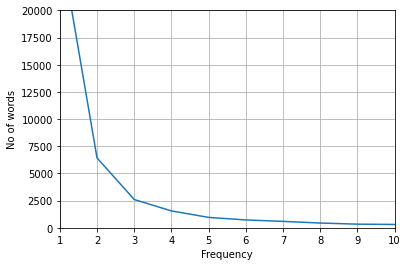

In [ ]:
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [ ]:
cutoff_freq = 80
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(80) : 339


In [ ]:
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [ ]:
X_train_dataset = np.zeros((len(X_train),len(features)))
for i in range(len(X_train)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [ ]:

X_test_dataset = np.zeros((len(X_test),len(features)))

for i in range(len(X_test)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(Y_train)
maxval=max(y)
maxval
minval=min(y)
minval

0

In [ ]:
yt = LabelEncoder().fit_transform(Y_test)
maxval1=max(yt)
maxval1

19

In [ ]:
y_train=np.array(changetomultilabel(y,20)).T
y_train.shape
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_test=np.array(changetomultilabel(yt,20)).T
y_test.shape

(20, 660)

In [ ]:
x_test=np.array(X_test_dataset.T)
x_train=np.array(X_train_dataset.T)

In [ ]:
x_test.shape


(43594, 660)

In [ ]:
x_train.shape

(43594, 1340)

In [ ]:
y_train.shape


(20, 1340)

In [ ]:
y_test.shape

(20, 660)

In [ ]:
iterations = 100
n_h = 1240
learning_rate = 0.02
Parameters, Cost_list = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)


Cost after 0 iterations is : 2.997907776068577
Cost after 10 iterations is : 2.9851454300016873
Cost after 20 iterations is : 2.9725009797251065
Cost after 30 iterations is : 2.9599784098310007
Cost after 40 iterations is : 2.9475822487266368
Cost after 50 iterations is : 2.935317296218694
Cost after 60 iterations is : 2.9231882569126766
Cost after 70 iterations is : 2.9111993202029782
Cost after 80 iterations is : 2.899353758332468
Cost after 90 iterations is : 2.8876536257211214


In [ ]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   

    a_out = np.argmax(a_out, 0)  
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [ ]:
print("Accuracy of Train Dataset", round(accuracy(x_train, y_train, Parameters),2), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, Parameters), 2), "%")

Accuracy of Train Dataset 41.19 %
Accuracy of Test Dataset 30.15 %


In [ ]:
iterations = 1000
n_h = 1240
learning_rate = 0.02
Parameters, Cost_list = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)


Cost after 0 iterations is : 2.9972834922885023
Cost after 100 iterations is : 2.8759984107011127
Cost after 200 iterations is : 2.7677001045540046
Cost after 300 iterations is : 2.670329092613411


In [ ]:
print("Accuracy of Train Dataset", round(accuracy(x_train, y_train, Parameters),2), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, Parameters), 2), "%")

**----------------------------------------------------------------------------------END_--------------------------------------------------------------------------------------------------------------**

array([ 4,  7,  9, ..., 10,  3,  1])

array([[ 4],
       [ 7],
       [ 9],
       ...,
       [10],
       [ 3],
       [ 1]])

In [ ]:
maxval=max(y)
maxval

array([19])

In [ ]:
minval=min(y)
minval

array([0])

In [ ]:
import torch
import torch.nn as nn

In [ ]:
y_test=LabelEncoder().fit_transform(Y_test)
y_test = y_test.reshape((len(y_test), 1))
y_test

In [ ]:
xo = np.hstack((np.ones((x.shape[0], 1)), x))

In [ ]:
input_layer_size = x.shape[1]                # Dimension of features
hidden_layer_size = input_layer_size*2  # of units in hidden layer 
output_layer_size = 20

In [ ]:
def initializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    return W

In [ ]:
initial_Theta1 = initializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = initializeWeights(hidden_layer_size, output_layer_size)
nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()), axis=None)


In [ ]:
# y=tf.convert_to_tensor(y)



# Reshape nn_params back into the parameters Theta1 and Theta2, 
# the weight matrices for our 2 layer neural network
Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(   (hidden_layer_size, input_layer_size + 1))
Theta2 = nn_params[hidden_layer_size *    (input_layer_size + 1):].reshape( (20, hidden_layer_size + 1))
# Setup some useful variables
m = x.shape[0]

In [ ]:
def sigmoid(z):
  g = np.frompyfunc(lambda x: 1 / (1 + np.exp(-x)), 1, 1)
  return g(z).astype(z.dtype)
def sigmoidGradient(z):
  return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
# Perform forward propagation for layer 2
z2 = np.matmul(xo, Theta1.transpose())
a2 = sigmoid(z2)
a2 = np.insert(a2, 0, 1, axis=1)
z3 = np.matmul(a2, Theta2.transpose())
a3 = sigmoid(z3)

In [ ]:
y_one_hot = np.zeros_like(a3)
for i in range(m):
  y_one_hot[i, y[i] - 1] = 1

In [ ]:
y_one_hot = np.zeros_like(a3)
for i in range(m):
  y_one_hot[i, y[i] - 1] = 1

In [ ]:
s3 = a3 - y
s2 = np.matmul(s3, Theta2) * sigmoidGradient(np.insert(z2, 0, 1, axis=1))
# remove z2 bias column
s2 = s2[:, 1:]

In [ ]:
p1 = (lambda_/m) * np.insert(Theta1[:, 1:], 0, 0, axis=1)
p2 = (lambda_/m) * np.insert(Theta2[:, 1:], 0, 0, axis=1)

In [ ]:
Theta1_grad = delta_1 / m + p1
Theta2_grad = delta_2 / m + p2
grad = np.concatenate((Theta1_grad.flatten(), 
  Theta2_grad.flatten()), axis=None)

NameError: ignored

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss 

In [ ]:
a=[
   [4],
   [0],
   [0],

]
b=[[0],[1],[0]]
c=softmax(a)

d=cross_entropy(b,c)
print(c)
print(d)

[[0.96466316]
 [0.01766842]
 [0.01766842]]
4.035976299748193


input_layer_size = x.shape[1]                    # Dimension of features
hidden_layer_size = input_layer_size*2    # of units in hidden layer
output_layer_size = 20

In [ ]:
def initializeWeights(L_in, L_out):
  epsilon_init = 0.12
  W = np.random.rand(L_out, 1 + L_in) * 2 * \
     epsilon_init - epsilon_init
  return W

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. 
from scipy import optimize as opt

In [ ]:
# Reshape nn_params back into the parameters Theta1 and Theta2, 
# the weight matrices for our 2 layer neural network
Theta1 = nn_params[:hidden_layer_size * \
   (input_layer_size + 1)].reshape( \
   (hidden_layer_size, input_layer_size + 1))
Theta2 = nn_params[hidden_layer_size * \
   (input_layer_size + 1):].reshape( \
   (num_labels, hidden_layer_size + 1))
# Setup some useful variables
m = X.shape[0]

NameError: ignored

In [ ]:
def sigmoid(z):
  g = np.frompyfunc(lambda x: 1 / (1 + np.exp(-x)), 1, 1)
  return g(z).astype(z.dtype)
def sigmoidGradient(z):
  return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
a1 = np.insert(x, 0, 1, axis=1)

In [ ]:
z2 = np.matmul(a1, Theta1.transpose())
a2 = sigmoid(z2)
a2 = np.insert(a2, 0, 1, axis=1
z3 = np.matmul(a2, Theta2.transpose())
a3 = sigmoid(z3)

In [ ]:
# turn Y into a matrix with a new column for each category and marked with 1
y_one_hot = np.zeros_like(a3)
for i in range(m):
  y_one_hot[i, y[i] - 1] = 1

In [ ]:
# Calculate the cost of our forward prop
ones = np.ones_like(a3
A = np.matmul(y_one_hot.transpose(), np.log(a3)) + \
  np.matmul((ones - y_one_hot).transpose(), np.log(ones - a3))
J = -1 / m * A.trace()
J += lambda_ / (2 * m) * \
  (np.sum(Theta1[:, 1:] ** 2) + np.sum(Theta2[:, 1:] ** 2))

In [ ]:
# Perform backward propagation to calculate deltas
s3 = a3 - yv
s2 = np.matmul(s3, Theta2) * \
  sigmoidGradient(np.insert(z2, 0, 1, axis=1))
# remove z2 bias column
s2 = s2[:, 1:]

model = NeuralNetwork(328,20)
train_model(x,y, model,100)